### Iris PCA:
As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. 

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher.

Here we will use **principal component analysis** (PCA; see In Depth: Principal Component Analysis), which is a fast linear dimensionality reduction technique. We will ask the model to return two components—that is, a two-dimensional representation of the data.


In [1]:
# load iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# create a feature matrix
X_iris = iris.drop('species', axis=1)

In [3]:
# Dimensionality Reduction
from sklearn.decomposition import PCA
model = PCA(n_components=2) # Instantiate the model with hyperparameters
model.fit(X_iris) # Fit to data.
X_2D = model.transform(X_iris) # Transform the data to two dimension

In [4]:
X_iris.shape

(150, 4)

In [5]:
X_2D.shape

(150, 2)

Now let's plot the results. A quick way to do this is to insert the results into the original `Iris DataFrame`, and use`Seaborn's` lmplot to show the results:

In [6]:
iris['PC1'] = X_2D[:, 0]
iris['PC2'] = X_2D[:, 1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


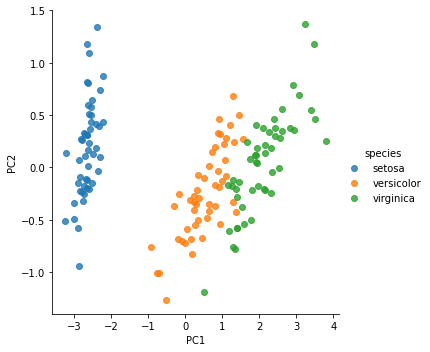

In [7]:
sns.lmplot("PC1", "PC2", hue='species', data=iris, fit_reg=False);

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels.

#### Iris Clustering
Let's look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a `Gaussian mixture model (GMM)`. A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [8]:
from sklearn import mixture # Choose the model class
model = mixture.GaussianMixture(n_components=3, covariance_type='full') # Instantiate the model with hyperparameter
model.fit(X_iris)
y_gmm = model.predict(X_iris) # Determine cluster labels

we will add the cluster label to the `Iris DataFrame` and use `Seaborn` to plot the results:

In [9]:
iris['Cluster'] = y_gmm
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2,Cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


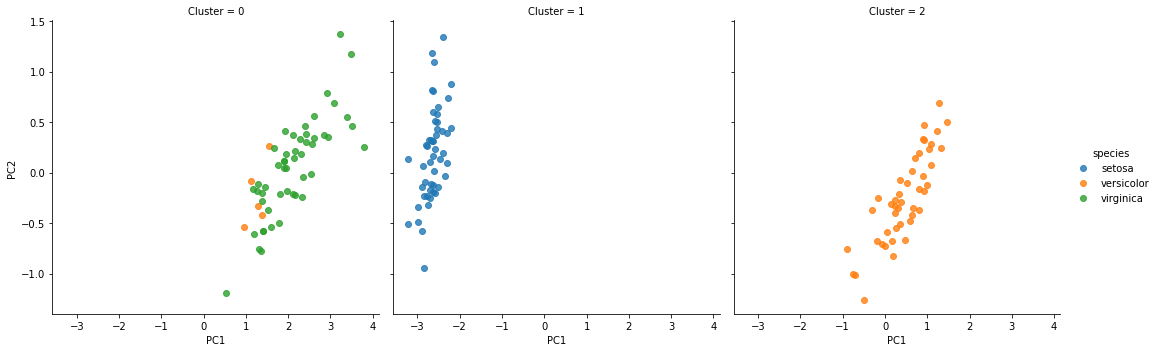

In [10]:
sns.lmplot("PC1", "PC2", data=iris, hue='species',
           col='Cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the `GMM algorithm` has recovered the underlying label: the `setosa species` is separated perfectly within `cluster 0`, while there remains a small amount of mixing between `versicolor` and `virginica`. This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm. This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

### Exploring Hand-written Digits

Let's consider one piece of the optical character recognition problem: the identification of `hand-written digits`. In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. Let's visualize the first hundred of these:

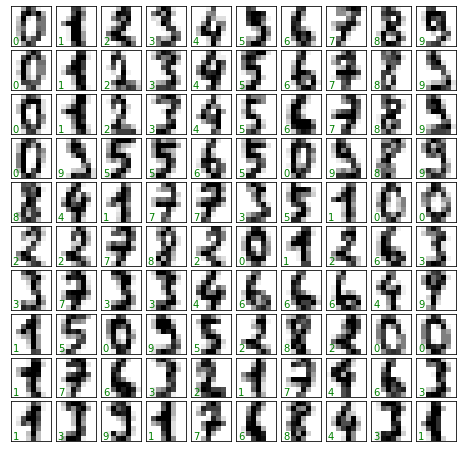

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(8,8),
                         subplot_kw = {'xticks':[],'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')


In order to work with this data within Scikit-Learn, we need a two-dimensional, `[n_samples, n_features]` representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [13]:
X = digits.data
X.shape

(1797, 64)

In [14]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

**Unsupervised learning: Dimensionality reduction**

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space. Instead we'll reduce the dimensions to 2, using an unsupervised method. Here, we'll make use of a manifold learning algorithm called Isomap, and transform the data to two dimensions:

In [15]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

We see that the projected data is now two-dimensional. Let's plot this data to see if we can learn anything from its structure:

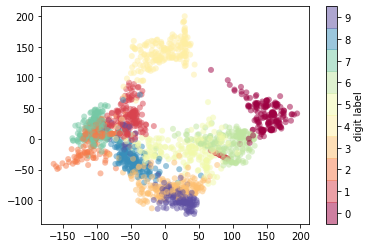

In [16]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. 
Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data. Let's give it a try.

##### Classification on digits
Let's apply a classification algorithm to the digits. As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=1)

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8533333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits! However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:

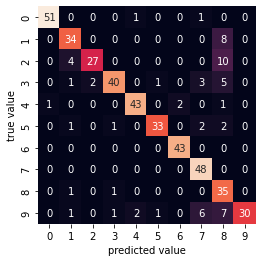

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_model)
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels: 

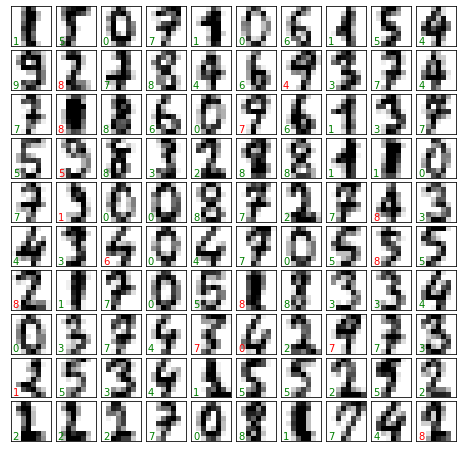

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally. To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines, random forests or another classification approach.